## TF Lite Breast Cancer Detection Week 2: Dataset Ingestion and Exploration
### Yinda Chen and Alice Tang

This week's notebook will provide an exploration of the dataset including definition of variables, data types, general dataset stats: count of rows, count of columns, etc;. We will also provide some helpful visualizations to gain deeper insights into the data we're using. 

#### Let's get started, shall we?

To preface, the dataset can be found here: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset. It can also be found in the "data" folder of this repository.

**This marks the beginning of the week 2 assignment.**


### Step 1: Import necessary libraries and ingest our data.

In [1]:
# Importing necessary libraries.
import os
import pandas as pd

# Getting the current working directory where the script is being executed.
# This line finds the absolute path of the current script and then gets the directory containing the script. 
# This helps construct paths relative to location of script, so anyone can run it!
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
# Essentially we're going up one level from current directory, and then accessing the 'data' directory where our files will be located.
data_dir = os.path.join(current_dir, '../data') 

# We're now ready to read the CSV files of our data! 
calc_case_test = pd.read_csv(os.path.join(data_dir, 'calc_case_description_test_set.csv'))
calc_case_train = pd.read_csv(os.path.join(data_dir, 'calc_case_description_train_set.csv'))
mass_case_test = pd.read_csv(os.path.join(data_dir, 'mass_case_description_test_set.csv'))
mass_case_train = pd.read_csv(os.path.join(data_dir, 'mass_case_description_train_set.csv'))

We have read our csv files, however, we still have dicom_info and meta_info in the form of zip files. 

Let's unzip these files and read the extracted csv files so we can finally begin!

In [2]:
# Importing necessary package.
import zipfile

# Defining the path to the zip files.
dicom_info_zip_path = os.path.join(data_dir, 'dicom_info.csv.zip')
meta_info_zip_path = os.path.join(data_dir, 'meta.csv.zip')

# Defining the extraction directory.
extraction_dir = os.path.join(data_dir, 'extracted')
os.makedirs(extraction_dir, exist_ok=True)

# Extracting dicom_info.csv.zip
with zipfile.ZipFile(dicom_info_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Extracting meta.csv.zip
with zipfile.ZipFile(meta_info_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Defining the paths to the extracted CSV files.
dicom_info_path = os.path.join(extraction_dir, 'dicom_info.csv')
meta_info_path = os.path.join(extraction_dir, 'meta.csv')

# Loading the CSV files, include error handling messages in case of any issues. 
try:
    dicom_info = pd.read_csv(dicom_info_path)
except FileNotFoundError:
    print(f"File not found: {dicom_info_path}")

try:
    meta_info = pd.read_csv(meta_info_path)
except FileNotFoundError:
    print(f"File not found: {meta_info_path}")

Great! All of our data is loaded, we're ready to move on to our next step of data exploration.

### Step 2: Explore the basic structure of each dataset.

Let's take an initial look at the dataset to get a sense of its contents and structure.

We'll learn about the number of rows and columns, data types of each column, missing values, and memory usage of the dataframe in this section.

#### We are going to check calc_case_test and calc_case_train first!

In [3]:
calc_case_test_info = calc_case_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

The calc_case_test DataFrame contains 326 rows and 14 columns. There's a mix of data types, where there are 4 integer columns, and 10 string object columns.

Most of the columns do not contain missing values, except for calc type with 322 non-null entries, and calc distribution with 263 non-null entries— indicating some missing values. 

The dataset provides information about patient IDs, breast density, breast side, image views, abnormalities, assessments, and file paths related to images and masks. 

#### Moving onto calc_case_train!

In [4]:
calc_case_train_info = calc_case_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

The calc_case_train DataFrame has 1,546 entries and 14 columns. It includes the same information as calc_train_test above.

All columns except calc type and calc distribution have complete data, with some missing values in these two columns. Additionally, the columns consist of integer and object data types.

#### Next, dicom_info.

In [5]:
dicom_info_info = dicom_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

Here, we see that dicom_info contains 10,237 entries and 38 columns with a variety of data types including integers, floating-point numbers, and objects, including numerical and categorical data. 

The dataset contains information regarding medical imaging files, such as file paths, image metadata, and patient information. 

Several columns, including AccessionNumber, PatientBirthDate, and PatientSex, have no valid data, while others like file_path, image_path, and BodyPartExamined are fully populated. Missing values are present in columns related to patient and study details.

#### Let's look at mass_case_test and mass_case_train next.

In [6]:
mass_case_test_info = mass_case_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

mass_case_description_test_set has 378 entries and 14 columns, with a mix of integer and object data types. 

No columns have missing values except for mass margins, which has some missing values (361 non-null). 

The dataset includes information about breast cancer cases, like patient ID, breast density, abnormality details, and image file paths. 

In [7]:
mass_case_train_info = mass_case_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

mass_case_description_train_set has 1,318 entries and 14 columns, consisting of both integer and object data types.

Once again, all columns have full data except for mass shape (1,314 non-null) and mass margins (1,275 non-null). 

This dataset provides the same information and columns as the test set above.

### Moving onto meta_info!

In [8]:
meta_info_info = meta_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


meta_info contains 6,775 entries and 9 columns, with a mix of integer and object data types. 

Each row provides information about medical imaging series, including SeriesInstanceUID, StudyInstanceUID, Modality, and SeriesDescription. 

There are no missing values. The integer fields include SeriesNumber, Visibility, and ImageCount, which may be useful for analysis. 

Great. We've examined the general structure of each dataset. 

Let's print the number of rows and columns for each dataset so it's easier to compare their shapes!

In [9]:
# Printing the number of rows and columns for each dataset with more descriptive output.
print(f"calc_case_test dataset has {calc_case_test.shape[0]} rows and {calc_case_test.shape[1]} columns.")
print(f"calc_case_train dataset has {calc_case_train.shape[0]} rows and {calc_case_train.shape[1]} columns.")
print(f"dicom_info dataset has {dicom_info.shape[0]} rows and {dicom_info.shape[1]} columns.")
print(f"mass_case_test dataset has {mass_case_test.shape[0]} rows and {mass_case_test.shape[1]} columns.")
print(f"mass_case_train dataset has {mass_case_train.shape[0]} rows and {mass_case_train.shape[1]} columns.")
print(f"meta_info dataset has {meta_info.shape[0]} rows and {meta_info.shape[1]} columns.")

# Storing the shapes in variables if needed later.
calc_case_test_shape = calc_case_test.shape
calc_case_train_shape = calc_case_train.shape
dicom_info_shape = dicom_info.shape
mass_case_test_shape = mass_case_test.shape
mass_case_train_shape = mass_case_train.shape
meta_info_shape = meta_info.shape


calc_case_test dataset has 326 rows and 14 columns.
calc_case_train dataset has 1546 rows and 14 columns.
dicom_info dataset has 10237 rows and 38 columns.
mass_case_test dataset has 378 rows and 14 columns.
mass_case_train dataset has 1318 rows and 14 columns.
meta_info dataset has 6775 rows and 9 columns.


### Step 2: Let's prepare to do some visualizations to delve deeper into the datasets. 

To start, we're going to combine the training and testing datasets of calc_case. This will give us a more comprehensive view of the data, ensuring that we can explore patterns and relationships across the entire dataset, rather than focusing on only a subset.

In [10]:
# Combining the train and test dataset of calc_case.
calc_case = pd.concat([calc_case_test, calc_case_train])

# Quickly checking the information, to ensure they were combined correctly.
calc_case.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1872 non-null   object
 1   breast density           1872 non-null   int64 
 2   left or right breast     1872 non-null   object
 3   image view               1872 non-null   object
 4   abnormality id           1872 non-null   int64 
 5   abnormality type         1872 non-null   object
 6   calc type                1848 non-null   object
 7   calc distribution        1433 non-null   object
 8   assessment               1872 non-null   int64 
 9   pathology                1872 non-null   object
 10  subtlety                 1872 non-null   int64 
 11  image file path          1872 non-null   object
 12  cropped image file path  1872 non-null   object
 13  ROI mask file path       1872 non-null   object
dtypes: int64(4), object(10)
memory usage: 219.4+ 

Great, the data was combined correctly. Let's use this to conduct some more thorough EDA, shall we?

### EDA Visualization for the "calc_case" Dataset

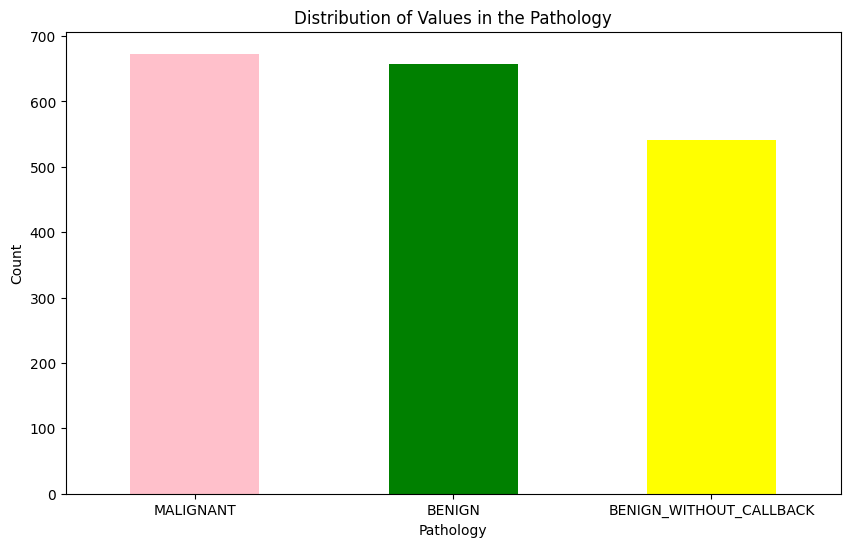

Count of each pathology type:
pathology
MALIGNANT                  673
BENIGN                     658
BENIGN_WITHOUT_CALLBACK    541
Name: count, dtype: int64


In [11]:
# Importing needed packages.
import matplotlib.pyplot as plt

# Let's examine the counts for "pathology", which is our target variable.
# This will show us how many cases we have for each type of pathology (e.g., benign, malignant).
pathology_counts = calc_case['pathology'].value_counts()

# Creating a bar plot to visualize the distribution of the "pathology" values.
plt.figure(figsize=(10, 6))

# Assigning specific colors based on the pathology type.
colors = ['pink' if pathology == 'MALIGNANT' else 
                                'green' if pathology == 'BENIGN' else 
                                'yellow' for pathology in pathology_counts.index]

# Plotting the value counts as a bar chart.
pathology_counts.plot(kind='bar', color=colors)

# Setting the title and labels for the chart.
plt.title('Distribution of Values in the Pathology')
plt.xlabel('Pathology')
plt.ylabel('Count')

# Let's keep the x-axis labels horizontal for better readability.
plt.xticks(rotation=0)

# Disabling the grid lines for a cleaner look (grid only on y-axis by default).
plt.grid(False)

# Displaying the chart.
plt.show()

# Counting the number of occurrences for each type of pathology.
pathology_counts = calc_case['pathology'].value_counts()

# Displaying the counts.
print("Count of each pathology type:")
print(pathology_counts)

As we can see here, the dataset is somewhat balanced between each pathology type, with a slightly higher number of malignant and benign cases compared to benign cases without callback. 

This is a good sign, since class balance is important for training a model to ensure it can effectively differentiate between all pathology types. Let's continue with some more EDA. 

We're gonna examine to see if there is any relevance between assessment and pathology now.

    assessment                pathology  count
0            0                   BENIGN     39
1            0                MALIGNANT     37
2            2                   BENIGN     18
3            2  BENIGN_WITHOUT_CALLBACK    534
4            2                MALIGNANT      1
5            3                   BENIGN     56
6            3  BENIGN_WITHOUT_CALLBACK      4
7            3                MALIGNANT     53
8            4                   BENIGN    543
9            4  BENIGN_WITHOUT_CALLBACK      3
10           4                MALIGNANT    385
11           5                   BENIGN      2
12           5                MALIGNANT    197


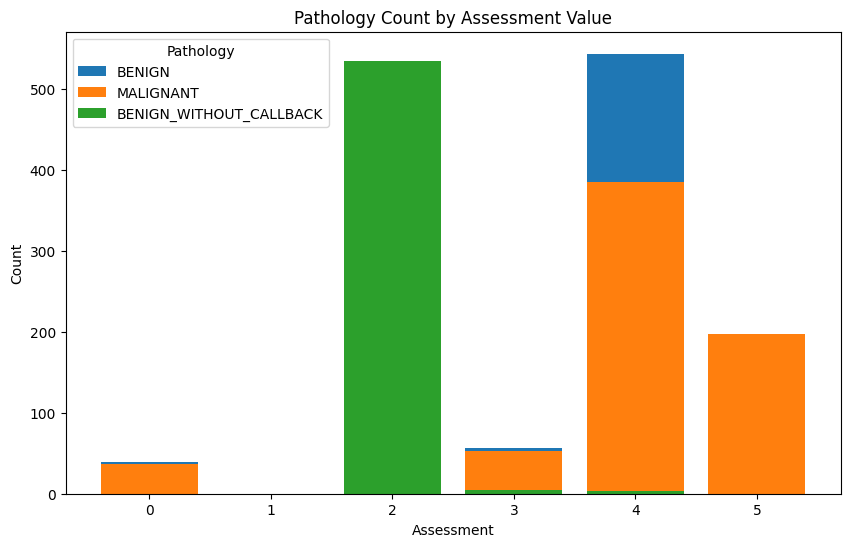

In [12]:
# looking for the relevance between assessment and pathology!

# Grouping the data by 'assessment' and 'pathology', and count occurrences for each combination.
assessment_pathology_counts = calc_case.groupby(['assessment', 'pathology']).size().reset_index(name='count')
print(assessment_pathology_counts)

plt.figure(figsize=(10, 6))

# Iterating through each unique pathology type.
for pathology in assessment_pathology_counts['pathology'].unique():
    
    # Filtering df to get rows corresponding to the current pathology type.
    subset = assessment_pathology_counts[assessment_pathology_counts['pathology'] == pathology]
    
    # Plotting a bar chart for the current pathology type.
    plt.bar(subset['assessment'], subset['count'], label=pathology)

# Adding labels and title to plot.
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Pathology Count by Assessment Value')
plt.legend(title='Pathology')

Essentially, we can garner a few things from this visualization. Different assessment stages will yield varied counts of pathology types.

1) Assessment 0 has a near-equal distribution of benign and malignant cases, while Assessment 2 primarily identifies benign cases without callbacks and very few malignant cases.
2) Assessment 3 has a more balanced distribution between benign and malignant cases, whereas Assessment 4 has high counts of both benign and malignant cases with few benign cases without callbacks.
3) Assessment 5 is focused on identifying malignant cases with very few benign cases, this could potentially suggest a more advanced diagnostic stage. This means that Assessment 5's emphasis may be on detecting more severe or potentially life-threatening conditions, rather than benign conditions. Potentially indicating that this stage might be used to confirm or investigate potential malignancies more thoroughly.

For background, this is what assessments typically indicate in medical imaging:

1. Assessment 0: Indicates that additional imaging or information is needed before a definitive diagnosis can be made.
2. Assessment 1: Generally means that the results are normal or benign with no further action needed.
3. Assessment 2: Indicates benign findings that are not cancerous and usually require routine follow-up.
4. Assessment 3: Suggests that there is a suspect finding that requires closer monitoring or additional imaging to rule out cancer.
5. Assessment 4: Indicates a higher suspicion of cancer, where a biopsy or other diagnostic procedure is recommended to confirm the presence of cancer.
6. Assessment 5: Represents a high suspicion of malignancy, and a diagnosis of cancer is highly likely. Immediate action and treatment are typically recommended.

Source: https://www.cancercenter.com/cancer-types/breast-cancer/diagnosis-and-detection/mammography/results-bi-rads

### Step 3: Let's move onto conducting some more EDA for the predictor variables in the calc_case dataset!

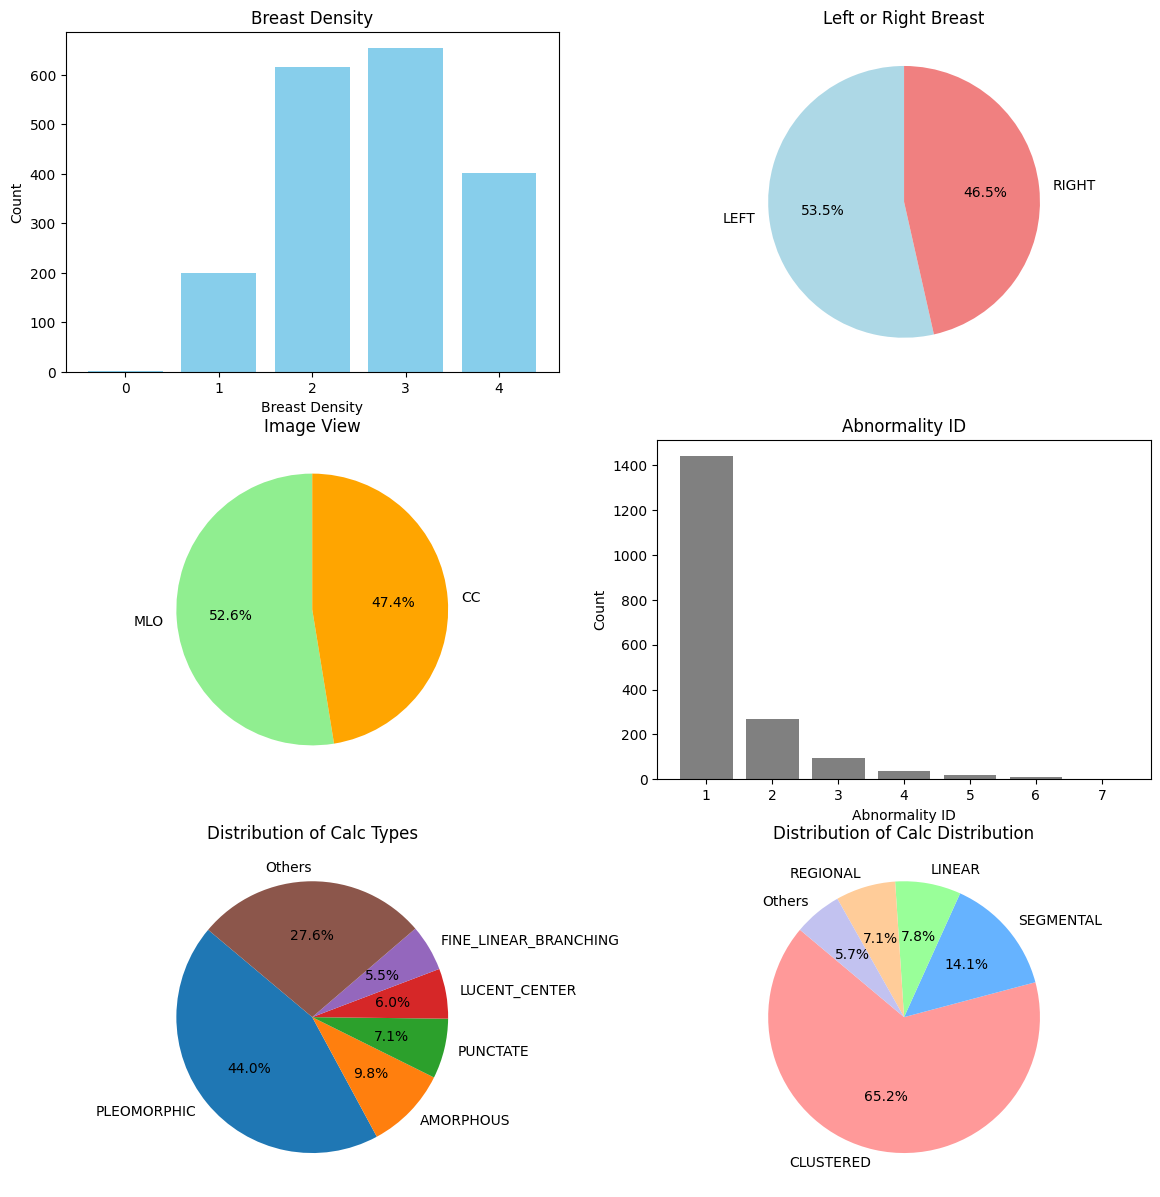

In [13]:
# Creating a figure with 3 rows and 2 columns of subplots.
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Calculating the counts of unique values for several predictor variables.
breast_density = calc_case['breast density'].value_counts()
breast_side = calc_case['left or right breast'].value_counts()
image_view = calc_case['image view'].value_counts()
abnormality_id = calc_case['abnormality id'].value_counts()
calc_type = calc_case['calc type'].dropna().value_counts()
calc_distribution = calc_case['calc distribution'].dropna().value_counts()

# Plotting bar chart for 'breast_density' in the first subplot (top-left).
axs[0, 0].bar(breast_density.index, breast_density.values, color='skyblue')
axs[0, 0].set_title('Breast Density')  # Setting the title for the plot.
axs[0, 0].set_xlabel('Breast Density')  # Labeling x-axis.
axs[0, 0].set_ylabel('Count')  # Labeling y-axis.

# Plotting pie chart for 'left or right breast' in the first subplot (top-right).
axs[0, 1].pie(breast_side, labels=breast_side.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0, 1].set_title('Left or Right Breast')  # Setting the title for the plot.

# Plotting pie chart for 'image view' in the second subplot (middle-left).
axs[1, 0].pie(image_view, labels=image_view.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
axs[1, 0].set_title('Image View')  # Setting the title for the plot.

# Plotting bar chart for 'abnormality id' in the second subplot (middle-right).
axs[1, 1].bar(abnormality_id.index, abnormality_id.values, color='grey')
axs[1, 1].set_title('Abnormality ID')  # Setting the title for the plot.
axs[1, 1].set_xlabel('Abnormality ID')  # Labeling x-axis.
axs[1, 1].set_ylabel('Count')  # Labeling y-axis.

# Plotting pie chart for 'calc type' in the third subplot (bottom-left).
# Combining categories with counts less than 5% into 'Others' for better clarity.
threshold = 0.05 * calc_type.sum()
calc_type_combined = calc_type.copy()
calc_type_combined[calc_type_combined < threshold] = 0
others_count = calc_type[calc_type < threshold].sum()

# Adding 'Others' category to the data.
calc_type_combined = calc_type_combined[calc_type_combined > 0]
calc_type_combined['Others'] = others_count

# Plotting the pie chart for 'calc type'.
axs[2, 0].pie(calc_type_combined, labels=calc_type_combined.index, autopct='%1.1f%%', startangle=140)
axs[2, 0].set_title('Distribution of Calc Types')  # Setting the title for the plot.

# Plotting pie chart for 'calc distribution' in the third subplot (bottom-right).
# Combining categories with counts less than 5% into 'Others' for better clarity.
threshold_distribution = 0.05 * calc_distribution.sum()
calc_distribution_combined = calc_distribution.copy()
calc_distribution_combined[calc_distribution_combined < threshold_distribution] = 0
others_distribution_count = calc_distribution[calc_distribution < threshold_distribution].sum()

# Adding 'Others' category to the data.
calc_distribution_combined = calc_distribution_combined[calc_distribution_combined > 0]
calc_distribution_combined['Others'] = others_distribution_count

# Defining colors for the pie chart for 'calc distribution'.
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff6666', '#c2f0c2']
# Plotting the pie chart for 'calc distribution'.
axs[2, 1].pie(calc_distribution_combined, labels=calc_distribution_combined.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[2, 1].set_title('Distribution of Calc Distribution')  # Setting the title for the plot.

# Displaying the plots.
plt.show()

### Let's examine these visualizations!

**Breast Density:**
The breast density distribution reveals that most cases fall into moderate (density 3) and high (density 2 and 4) categories, with density 3 being the most common. High-density breasts, which are associated with more fibroglandular tissue, can make mammograms harder to interpret, while lower-density cases (density 1) are less common and typically provide clearer images. The very rare density 0 cases may indicate anomalies or errors in the data.

**Left or Right Breast Distribution:**
The left or right breast distribution shows a slightly higher number of images from the left breast (1002) compared to the right breast (870). This could reflect either a higher incidence of imaging on the left or a data imbalance. 

**Image View Distribution:**
For the image view distribution, the MLO (Mediolateral Oblique) view is more common (984) than the CC (Craniocaudal) view (888). The MLO view captures a broader area of the breast and is often preferred for its diagnostic benefits, while the CC view provides a different perspective for a more comprehensive examination.

**Abnormality ID Distribution:**
The abnormality id distribution reveals that most abnormalities are identified with abnormality id 1 (1441 cases), indicating it is the most frequently observed type. Other ids are less common, with id 2 following at 267 cases, and a significant drop in the number of cases for ids 3 (94), 4 (37), 5 (21), 6 (10), and 7 (2). This distribution suggests that abnormality id 1 is predominant in the dataset, while the other types are relatively rare.

**Calc Type Distribution:**
The calc type distribution shows a wide range of types, with PLEOMORPHIC being the most common, recorded in 813 cases. Other types, such as AMORPHOUS (181 cases) and PUNCTATE (132 cases), are less frequent but still significant. Many types are relatively rare, with counts ranging from a few cases to just one. This suggests that while certain calcification types are predominant, there is considerable variability in the types present in the dataset, with numerous less common and combined types also represented.

**Calc Distribution:**
The calc distribution data reveals that CLUSTERED is the most prevalent distribution type, appearing in 935 cases. SEGMENTAL and LINEAR are less common, with 202 and 112 occurrences, respectively. REGIONAL is relatively infrequent, recorded 102 times. The combined types, such as CLUSTERED-LINEAR and LINEAR-SEGMENTAL, have even fewer occurrences, with REGIONAL-REGIONAL being the rarest, appearing only once. This distribution suggests that while CLUSTERED is the dominant distribution pattern, there is a diversity of less common patterns and combinations present in the dataset.

### Step 4: Now, we'll conduct more EDA for the mass_case dataset!

We'll combine both the train and test dataset again.

In [14]:
# Combining the train and test dataset of mass_case.
mass_case = pd.concat([mass_case_test, mass_case_train])

# Checking the information...
mass_case.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1696 non-null   object
 1   breast_density           1696 non-null   int64 
 2   left or right breast     1696 non-null   object
 3   image view               1696 non-null   object
 4   abnormality id           1696 non-null   int64 
 5   abnormality type         1696 non-null   object
 6   mass shape               1692 non-null   object
 7   mass margins             1636 non-null   object
 8   assessment               1696 non-null   int64 
 9   pathology                1696 non-null   object
 10  subtlety                 1696 non-null   int64 
 11  image file path          1696 non-null   object
 12  cropped image file path  1696 non-null   object
 13  ROI mask file path       1696 non-null   object
dtypes: int64(4), object(10)
memory usage: 198.8+ 

Everything combined correctly, and once again, we're moving onto the visualizations!

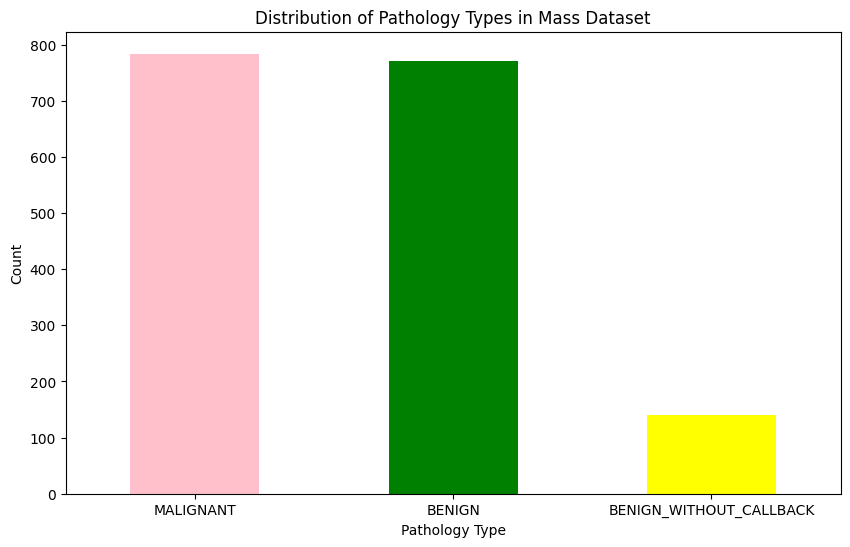

In [15]:
# Counting the occurrences of each pathology type.
assessment_counts = mass_case['pathology'].value_counts()

plt.figure(figsize=(10, 6))

# Defining colors for each pathology type.
colors = ['pink' if pathology == 'MALIGNANT' else 
          'green' if pathology == 'BENIGN' else 
          'yellow' for pathology in assessment_counts.index]

# Plotting the counts as a bar chart.
assessment_counts.plot(kind='bar', color=colors)

# Adding labels and title to the plot.
plt.title('Distribution of Pathology Types in Mass Dataset')
plt.xlabel('Pathology Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Removing grid lines.
plt.grid(False)

# Displaying the plot.
plt.show()

The distribution of the pathology data gives 784 malignant cases, 771 benign cases, and 141 benign without callback cases. 

In general, this dataset is fairly balanced between malignant and benign cases, with slightly more malignant cases. The relatively small number of benign without callback cases suggests that this category is less common, showing that it is a less frequent but still notable diagnostic outcome.

### Great! We're ready to do some more EDA for some predictor variables in the mass dataset.

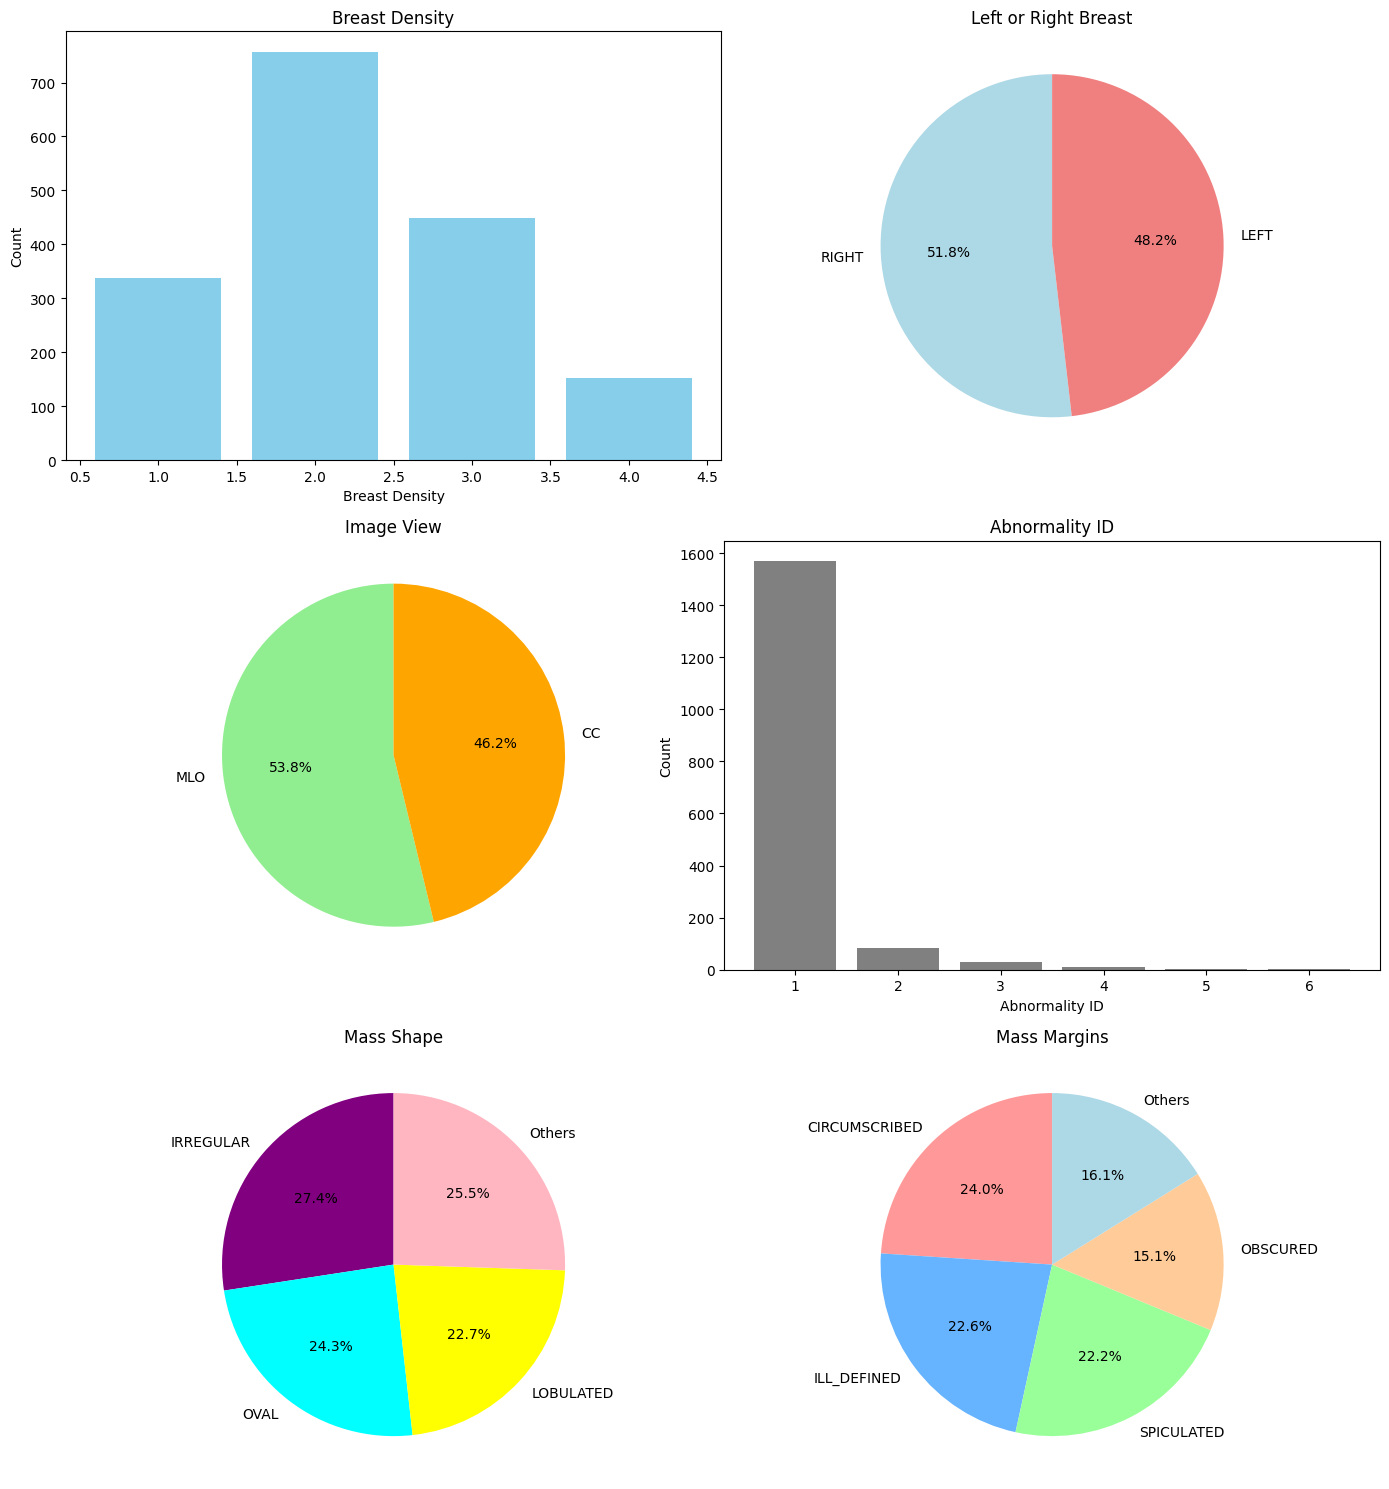

In [16]:
# Creating a figure with 3 rows and 2 columns of subplots.
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Calculating counts for each predictor variable.
breast_side = mass_case['left or right breast'].value_counts()
image_view = mass_case['image view'].value_counts()
breast_density = mass_case['breast_density'].value_counts()
mass_margin = mass_case['mass margins'].value_counts()
abnormality_id = mass_case['abnormality id'].value_counts()
mass_shape = mass_case['mass shape'].value_counts()

# Plotting bar chart for 'breast_density' in the first subplot.
axs[0, 0].bar(breast_density.index, breast_density.values, color='skyblue')
axs[0, 0].set_title('Breast Density')
axs[0, 0].set_xlabel('Breast Density')
axs[0, 0].set_ylabel('Count')

# Plotting pie chart for 'left or right breast' in the second subplot.
axs[0, 1].pie(breast_side, labels=breast_side.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0, 1].set_title('Left or Right Breast')

# Plotting pie chart for 'image view' in the third subplot.
axs[1, 0].pie(image_view, labels=image_view.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
axs[1, 0].set_title('Image View')

# Plotting bar chart for 'abnormality id' in the fourth subplot.
axs[1, 1].bar(abnormality_id.index, abnormality_id.values, color='grey')
axs[1, 1].set_title('Abnormality ID')
axs[1, 1].set_xlabel('Abnormality ID')
axs[1, 1].set_ylabel('Count')

# Plotting pie chart for 'mass shape' in the fifth subplot.
# Calculating percentages for 'mass shape'.
mass_shape_percentage = mass_shape / mass_shape.sum() * 100

# Combining 'mass shape' categories with less than 10% into 'Others'.
mass_shape_filtered = mass_shape.copy()
small_shapes = mass_shape_percentage[mass_shape_percentage < 10].index
mass_shape_filtered['Others'] = mass_shape[small_shapes].sum()
mass_shape_filtered = mass_shape_filtered.drop(small_shapes)
axs[2, 0].pie(mass_shape_filtered, labels=mass_shape_filtered.index, autopct='%1.1f%%', startangle=90, colors=['purple', 'cyan', 'yellow', 'lightpink'])
axs[2, 0].set_title('Mass Shape')

# Plotting pie chart for 'mass margins' in the sixth subplot.
# Calculating percentages for 'mass margins'.
mass_margin_percentage = mass_margin / mass_margin.sum() * 100

# Combining 'mass margins' categories with less than 10% into 'Others'.
mass_margin_filtered = mass_margin.copy()
small_margins = mass_margin_percentage[mass_margin_percentage < 10].index
mass_margin_filtered['Others'] = mass_margin[small_margins].sum()
mass_margin_filtered = mass_margin_filtered.drop(small_margins)

# Defining colors for the 'mass margins' pie chart.
new_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'lightblue']
axs[2, 1].pie(mass_margin_filtered, labels=mass_margin_filtered.index, autopct='%1.1f%%', startangle=90, colors=new_colors)
axs[2, 1].set_title('Mass Margins')

# Adjusting the layout of the subplots to prevent overlap.
plt.tight_layout()

# Displaying the updated charts.
plt.show()


### Let's delve deeper into the meaning of these visualizations.


**Breast Density:** The distribution of breast density categories shows that most images fall into category 2 (757 images), followed by category 3 (449 images), category 1 (337 images), and category 4 (153 images). This shows that the dataset includes a higher number of images with moderate breast density (category 2), with fewer images representing the densest categories (1 and 4).

**Left or Right Breast:** The dataset shows that there are 879 images of the right breast and 817 images of the left breast. This indicates a fairly balanced distribution between the two sides, with slightly more images from the right breast.

**Image View:** There are 912 images taken from the MLO (medio-lateral oblique) view and 784 images from the CC (craniocaudal) view. This suggests that the MLO view is more frequently used in this dataset, which might be due to its broader coverage of the breast tissue compared to the CC view.

**Abnormality ID:** The majority of abnormalities are classified as ID 1 (1570 occurrences), indicating a predominance of this type. The other IDs are much less common, with ID 2 (84 occurrences) being the next most frequent, and IDs 3, 4, 5, and 6 being rare, showing fewer cases with these classifications.

**Mass Shapes:** The distribution of mass shapes shows that the most common shape is IRREGULAR (464 occurrences), followed by OVAL (412 occurrences) and LOBULATED (384 occurrences). This shows that there is a sense of variability in the mass shapes observed. Less frequent shapes include ROUND (164 occurrences) and ARCHITECTURAL_DISTORTION (103 occurrences), with several rarer combinations of these shapes, such as IRREGULAR-ARCHITECTURAL_DISTORTION (52 occurrences) and LYMPH_NODE (35 occurrences). Various other shape combinations appear in very small numbers, showing a wide range of potential mass shapes.

**Mass Margins:** The most common mass margin type is CIRCUMSCRIBED (392 occurrences), indicating a clear and well-defined boundary. This is followed by ILL_DEFINED (370 occurrences) and SPICULATED (363 occurrences), which suggest less well-defined or more irregular boundaries. Less frequent types include OBSCURED (247 occurrences) and MICROLOBULATED (129 occurrences), with various combinations of these characteristics appearing less frequently.

### Great, so what do we know from all of this data? Let's break it down and give a summary.

#### Firstly, we can define the variables. 
1. **pathology** is our target variable. There are 3 values of **BENIGN**, **BENIGN_WITHOUT_CALLBACK**, and**MALIGNANT**.
2. **image view**: The orientation in which the mammogram was taken. CC indicates from Ccraniocaudal view (from top to bottom), and MLO stands for mediolateral oblique view (from the side at an angle).
3. **abnormality id**: A unique identifier for each abnormality in the dataset. It helps differentiate multiple abnormalities in the same patient.
4. **abnormality type**: This describes the type of abnormality detected in the image. In this case, all abnormalities appear to be "calcification," which refers to small calcium deposits that can indicate breast cancer or other conditions.
5. **calc type**: Describes the specific type of calcification. Types like "AMORPHOUS" or "PLEOMORPHIC" describe the shape and characteristics of the calcifications, which can help in diagnosis.
6. **calc distribution**: Describes how the calcifications are distributed in the breast tissue.
7. **mass shape**: Describes the shape of the mass identified in the mammogram. Some common mass shapes and their meanings include:
<br> *IRREGULAR:* The mass has an uneven or undefined shape, which can be a sign of malignancy.
<br> *OVAL:* The mass has an oval shape, which is typically associated with benign findings.
<br> *ROUND:* The mass is round, which can also suggest benign characteristics.
<br> *ARCHITECTURAL DISTORTION:* The normal structure of breast tissue is distorted without an apparent mass, which may be a sign of malignancy.
8. **mass margins**: Describes the borders of the mass. The margin characteristics are critical for assessing the likelihood of malignancy. Some margin types include:
<br>*SPICULATED:* The mass has spikes or spiculations extending into the surrounding tissue, which is often associated with malignancy.
<br>*ILL_DEFINED:* The mass has poorly defined edges, making it harder to differentiate from surrounding tissue, which may raise suspicion for cancer.
<br>*CIRCUMSCRIBED:* The mass has smooth, well-defined borders, which is more commonly associated with benign masses.
<br>*MICROLOBULATED:* The mass has slightly lobulated or bumpy borders, which can indicate malignancy in some cases.

Additionally, we know that the dataset is categorized into two types: calcification and mass.

#### General Dataset Statistics

- **Total Images**:
  - **Calcification**: 1,872 images
  - **Mass**: 1,696 images

- **Pathology Distribution**:
  - **Malignant**: 1,457 images
  - **Benign**: 1,429 images
  - **Benign Without Callback**: 682 images

The goal of this notebook is to provide a clearer overview and deeper understanding of the data we are working with. With these insights, we are prepared to advance to the next week, where we will continue to explore and analyze the data in greater detail.

**This marks the end of the week 2 assignment.**